<h1 style="text-align:center; font-family:consolas;">Analyzing selling price of used cars using Python</h1>

<h3 style="font-family:cascadia code;">Import Required Libraries</h3>

In [1]:
# importing section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

<h3 style="font-family:cascadia code;">Read CSV file and display few data using head</h3>

In [3]:
# using the Csv file
df = pd.read_csv('CarSales.csv')

# Checking the first 5 entries of dataset
df.head()


,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,NaN,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3 style="font-family:cascadia code;">column names are missing, Add header columns.</h3>

In [4]:
headers = ["symboling", "normalized-losses", "make",
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size",
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,NaN,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3 style="font-family:cascadia code;">Find missing values</h3>

In [5]:
#  FInding the Missing values
data = df

# Finding the missing values
print(data.isna().any())

# isnull() serves same purpose as isna() - checks for presence of null values, just for convention they both exists
# print(data.isnull().any())

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration            True
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool


<h3 style="font-family:cascadia code;">Convert MPG to L/100 km</h3>

In [6]:
# converting mpg to L / 100km
data['city-mpg'] = 235 / df['city-mpg']
data.rename(columns = {'city-mpg': "city-L / 100km"}, inplace = True)

print(data.columns)

# checking the data type of each column
data.dtypes


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L / 100km',
       'highway-mpg', 'price'],
      dtype='object')


,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


<h3 style="font-family:cascadia code;">Data contains '?', solve it</h3>

In [7]:
# Here it contains '?', so we will convert it to not a number (nan) so panda can recognize it as missing value

data.replace('?', np.nan, inplace=True)

# We can use fillna() method to replace these null values with meaningfull values but
# For now we are just going to drop all data with null values
data = data.dropna()

<h3 style="font-family:cascadia code;">Check Unique Prices</h3>

In [8]:
data.price.unique()

array(['13950', '17450', '17710', '23875', '16430', '16925', '20970',
       '21105', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8921', '12964', '6479', '6855', '5399', '6529',
       '7129', '7295', '7895', '9095', '8845', '10295', '12945', '10345',
       '32250', '5195', '6095', '6795', '6695', '7395', '8495', '10595',
       '10245', '11245', '18280', '25552', '28248', '28176', '31600',
       '35056', '5389', '6189', '6669', '7689', '9959', '8499', '6989',
       '8189', '9279', '5499', '7099', '6649', '6849', '7349', '7299',
       '7799', '7499', '7999', '8249', '8949', '9549', '13499', '14399',
       '17199', '19699', '18399', '11900', '13200', '15580', '16900',
       '16630', '17950', '18150', '22018', '11850', '12170', '15040',
       '15510', '18620', '5118', '7053', '7603', '7126', '7775', '9960',
       '9233', '11259', '7463', '10198', '8013', '11694', '5348', '6338',
       '6488', '6918', '7898', '8778', '6938', '7198', '7788', '77

<h3 style="font-family:cascadia code;">Price is type Object, change it to int.</h3>

In [16]:
# locate the price column and change it type to int
data['price'] = data['price'].astype(int)
data['price'].dtype

<ipython-input-16-ba9a8411e5d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype(int)


dtype('int64')

<h3 style="font-family:cascadia code;">Normalize values using scaling method and do binnin and grouping of values.</h3>

3         Low
4      Medium
6      Medium
8      Medium
10     Medium
        ...  
200    Medium
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 159, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


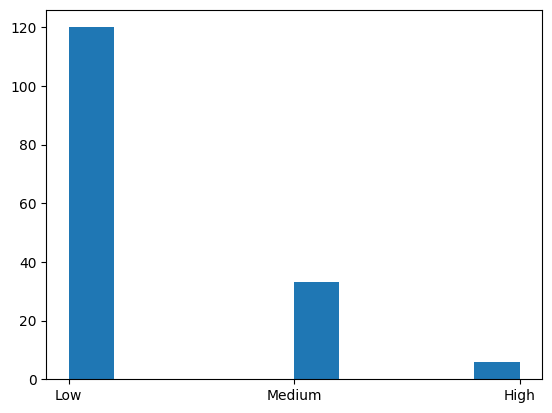

In [17]:
data.loc[:,'length'] = data['length']/data['length'].max()
data.loc[:,'width'] = data['width']/data['width'].max()
data.loc[:,'height'] = data['height']/data['height'].max()

# binning- grouping values
# linspace will take min and max values and cut them evenly in 4 parts with 3 equal interval
# first intervel between 1 and 2, second - between 2 and 3 and third - between 3 and 4
bins = np.linspace(min(data['price']), max(data['price']), 4)

# These labels will be used to identify value as low medium or high
group_names = ['Low', 'Medium', 'High']

# This line will take price column and based on where they fall on bin intervel , it assigns Group labels to price
data.loc[:,'price-binned'] = pd.cut(data['price'], bins,
                              labels = group_names,
                              include_lowest = True)

print(data['price-binned'])

# create a histogram
plt.hist(data['price-binned'])
plt.show()

<h3 style="font-family:cascadia code;">Descriptive Analysis.</h3>

In [18]:
# categorical to numerical variables
# pd.get_dummies(data['fuel-type']).head()

# descriptive analysis
# NaN are skipped for this dataset we have removed nan
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L / 100km,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,0.851006,0.915029,0.901327,2461.138365,119.226415,10.161132,9.324008,32.081761,11445.729560
std,1.193086,5.167416,0.056876,0.027167,0.037939,481.941321,30.460791,3.889475,2.127124,6.459189,5877.856195
min,-2.000000,86.600000,0.696446,0.841004,0.826087,1488.000000,61.000000,7.000000,4.795918,18.000000,5118.000000
25%,0.000000,94.500000,0.817621,0.892608,0.873746,2065.500000,97.000000,8.700000,7.580645,28.000000,7372.000000
50%,1.000000,96.900000,0.850938,0.912134,0.904682,2340.000000,110.000000,9.000000,9.038462,32.000000,9233.000000
75%,2.000000,100.800000,0.877591,0.927476,0.928094,2809.500000,135.000000,9.400000,10.217391,37.000000,14719.500000
max,3.000000,115.600000,1.000000,1.000000,1.000000,4066.000000,258.000000,23.000000,15.666667,54.000000,35056.000000


<h3 style="font-family:cascadia code;">Plot the data according to the price based on engine size.</h3>

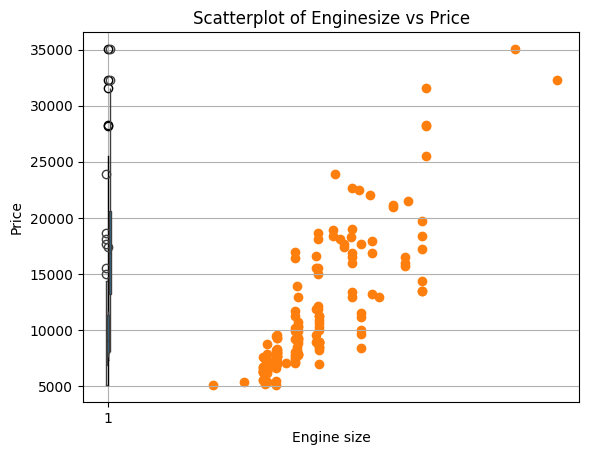

In [19]:
#  box plot
plt.boxplot(data['price'])

# by using seaborn
sns.boxplot(x ='drive-wheels', y ='price', data = data)

# Predicting price based on engine size
# Known on x and predictable on y
plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

<h3 style="font-family:cascadia code;">Grouping the data according to wheel, body-style and price</h3>

In [20]:
# Grouping Data
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],
                         as_index = False).mean()

data_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,hardtop,8249.000000
4,fwd,hatchback,7989.800000
5,fwd,sedan,9558.120000
6,fwd,wagon,8829.222222
7,rwd,convertible,26362.500000
8,rwd,hardtop,14365.750000
9,rwd,hatchback,14918.500000


<h3 style="font-family:cascadia code;">Plot heatmap.</h3>

       body-style 
price  convertible    float64
       hardtop        float64
       hatchback      float64
       sedan          float64
       wagon          float64
dtype: object


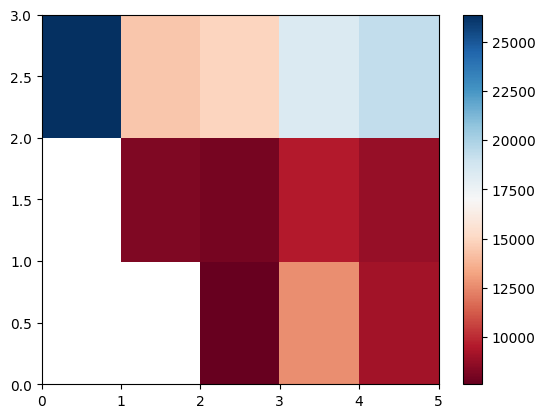

In [21]:
# pivot method
data_pivot = data_grp.pivot(index = 'drive-wheels',
                            columns = 'body-style')
data_pivot
print(data_pivot.dtypes)
# heatmap for visualizing data
plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()

In [22]:
data.to_csv('updated_data.csv', index=False, encoding='utf-8')